In [41]:
import sys
sys.path.append(r"C:\Users\Utkarsh\Python\libraries")

import importlib
import dataset_downloader
importlib.reload(dataset_downloader)

from dataset_downloader import download_kaggle_dataset as downloader

downloader("oil_production")

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data as a pandas DataFrame
df_petroleum = pd.read_csv("datasets/petroleum.csv", parse_dates=["DATEPRD"])

# Preview
display(df_petroleum.head())
display(df_petroleum.tail())
display(df_petroleum.info())

,Unnamed: 0,DATEPRD,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,0,2009-01-30,257.442241,105.339191,163.294586,35.298817,94.147654,73.616443,61.049726,4535.43,649388.07,298.19
1,1,2009-02-11,261.481233,105.364799,164.352071,34.697693,97.129162,80.237200,65.804801,4379.88,629307.34,143.54
2,2,2009-02-20,264.386001,105.410873,166.214057,34.779443,98.171944,78.439751,64.987169,4509.07,638750.17,108.74
3,3,2009-02-22,266.709086,105.395959,166.273529,34.054792,100.435557,80.121769,67.330436,4319.02,612912.62,106.60
4,4,2009-02-23,266.667137,105.410516,166.513059,34.395363,100.154078,81.010145,66.986427,4417.66,625514.01,117.37


,Unnamed: 0,DATEPRD,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
2360,2360,2016-07-08,266.038019,100.327722,238.474961,100.000000,27.563058,89.309512,1.998215,106.30,17541.20,3187.95
2361,2361,2016-07-09,268.812764,100.295456,239.081167,82.190685,29.731597,87.864056,4.114340,102.09,16681.29,2326.24
2362,2362,2016-07-10,265.922630,100.338436,238.398367,100.000000,27.524263,89.153704,1.959482,113.38,18753.12,3185.47
2363,2363,2016-07-11,267.768521,100.320956,238.638669,91.162324,29.129852,89.074774,3.407768,108.84,17979.28,3056.29
2364,2364,2016-07-12,266.002483,100.345865,238.273904,100.000000,27.728579,89.503524,1.938210,113.84,18543.76,3148.91


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2365 entries, 0 to 2364
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                2365 non-null   int64         
 1   DATEPRD                   2365 non-null   datetime64[ns]
 2   AVG_DOWNHOLE_PRESSURE     2365 non-null   float64       
 3   AVG_DOWNHOLE_TEMPERATURE  2365 non-null   float64       
 4   AVG_DP_TUBING             2365 non-null   float64       
 5   AVG_CHOKE_SIZE_P          2365 non-null   float64       
 6   AVG_WHP_P                 2365 non-null   float64       
 7   AVG_WHT_P                 2365 non-null   float64       
 8   DP_CHOKE_SIZE             2365 non-null   float64       
 9   BORE_OIL_VOL              2365 non-null   float64       
 10  BORE_GAS_VOL              2365 non-null   float64       
 11  BORE_WAT_VOL              2365 non-null   float64       
dtypes: datetime64[ns](1)

None

In [47]:
df_petroleum = df_petroleum.dropna(subset=['DATEPRD', 'BORE_OIL_VOL', 'BORE_WAT_VOL', 'BORE_GAS_VOL'])
if 'BORE_GAS_VOL' in df_petroleum.columns:
    df_petroleum['BORE_GAS_VOL_MCF'] = df_petroleum['BORE_GAS_VOL'] / 1000

for col in ['BORE_OIL_VOL', 'BORE_WAT_VOL', 'BORE_GAS_VOL']:
    df_petroleum = df_petroleum[df_petroleum[col] >= 0]

df_petroleum["WATERCUT"] = (df_petroleum["BORE_WAT_VOL"] / (df_petroleum["BORE_OIL_VOL"] + df_petroleum["BORE_WAT_VOL"])) * 100
df_petroleum["GOR"] = df_petroleum["BORE_GAS_VOL"] / df_petroleum["BORE_OIL_VOL"]

In [34]:
print(f"\nCleaned DataFrame shape: {df_petroleum.shape}")


Cleaned DataFrame shape: (2365, 12)


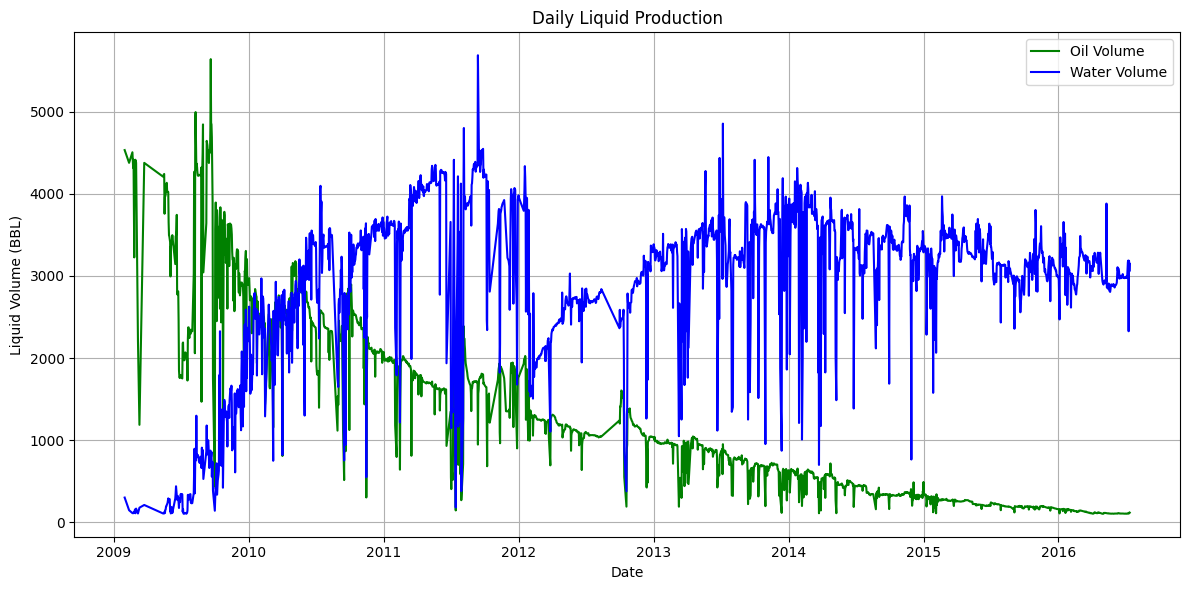

In [62]:
# Total daily liquid production
plt.figure(figsize=(12, 6))
plt.plot(df_petroleum['DATEPRD'], df_petroleum['BORE_OIL_VOL'], color='g', label='Oil Volume')
plt.plot(df_petroleum['DATEPRD'], df_petroleum['BORE_WAT_VOL'], color='b', label='Water Volume')
plt.title('Daily Liquid Production')
plt.xlabel('Date')
plt.ylabel('Liquid Volume (BBL)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\Utkarsh\AppData\Local\Temp\ipykernel_63596\4089181188.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


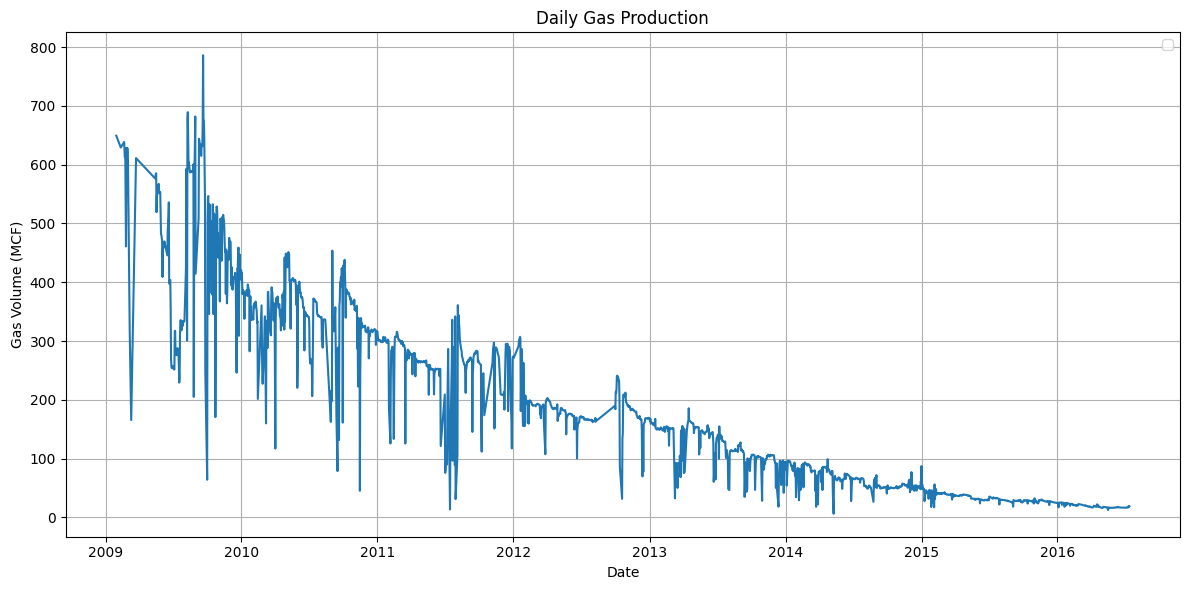

In [56]:
# Daily Gas production
plt.figure(figsize=(12, 6))
plt.plot(df_petroleum['DATEPRD'], df_petroleum['BORE_GAS_VOL_MCF'])
plt.title('Daily Gas Production')
plt.xlabel('Date')
plt.ylabel('Gas Volume (MCF)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

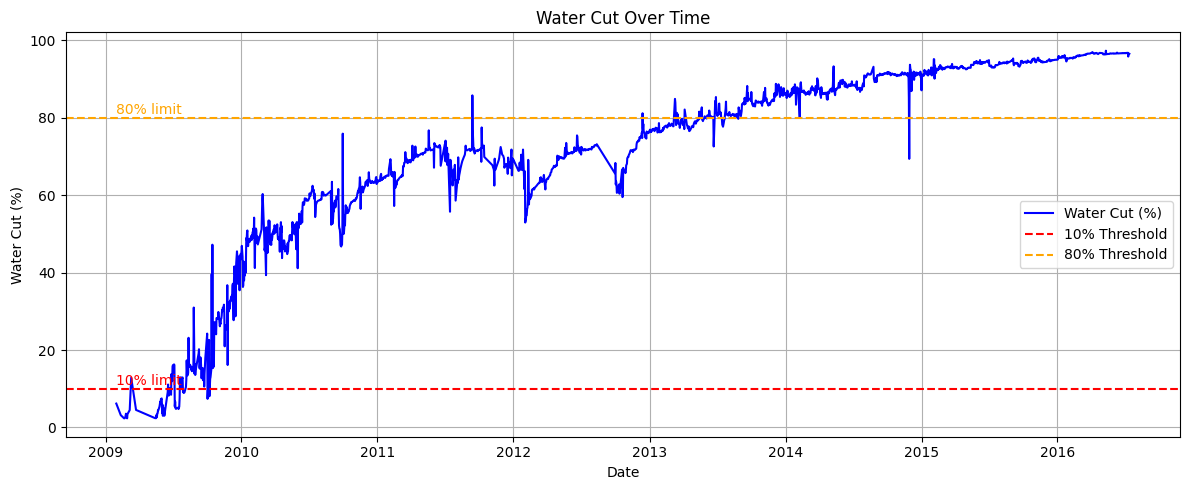

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df_petroleum["DATEPRD"], df_petroleum["WATERCUT"], label="Water Cut (%)", color='blue')
plt.axhline(10, color='red', linestyle='--', label="10% Threshold")
plt.axhline(80, color='orange', linestyle='--', label="80% Threshold")

# Adding labels above the lines
plt.text(df_petroleum["DATEPRD"].min(), 11, "10% limit", color='red')
plt.text(df_petroleum["DATEPRD"].min(), 81, "80% limit", color='orange')

plt.title(f"Water Cut Over Time")
plt.xlabel("Date")
plt.ylabel("Water Cut (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

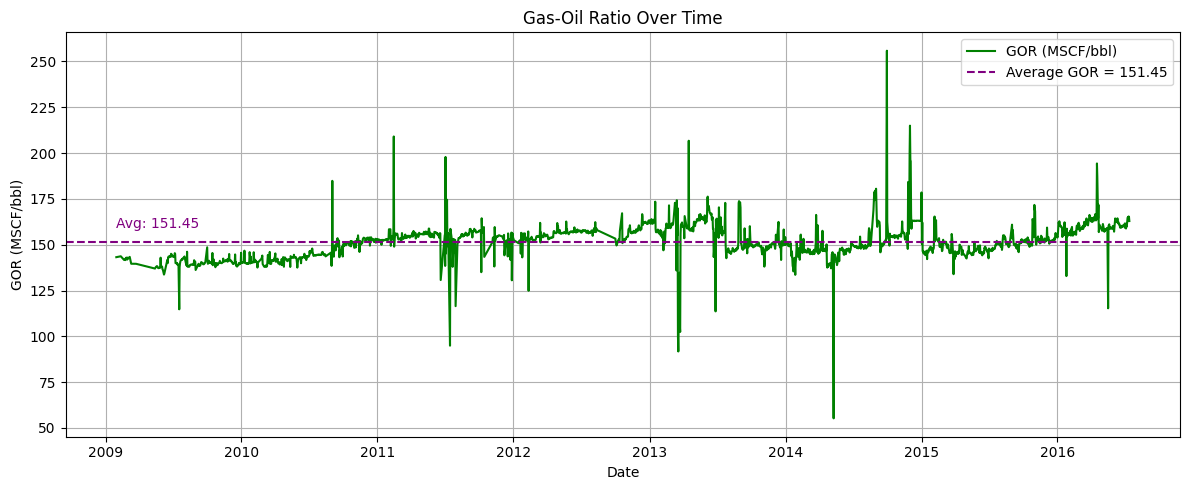

In [ ]:
avg_gor = df_petroleum["GOR"].mean()

plt.figure(figsize=(12, 5))
plt.plot(df_petroleum["DATEPRD"], df_petroleum["GOR"], label="GOR (MSCF/bbl)", color='green')
plt.axhline(avg_gor, color='purple', linestyle='--', label=f"Average GOR = {avg_gor:.2f}")

# Labelling the average line
plt.text(df_petroleum["DATEPRD"].min(), avg_gor * 1.05, f"Avg: {avg_gor:.2f}", color='purple')

plt.title(f"Gas-Oil Ratio Over Time")
plt.xlabel("Date")
plt.ylabel("GOR (MSCF/bbl)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()